# Micro Credit Defaulter Model

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df  = pd.read_csv('C:/Users/dell/Documents/New Folder/Micro Credit Project/datafile.csv')

In [5]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [8]:
df_temp = df.copy() #copy the dataset 

In [9]:
#seperating date,day and year from pdate and dropping pdate


df_temp['pdate'] = pd.to_datetime(df_temp['pdate'])

In [10]:
df_temp['pdate_day'] = df_temp['pdate'].dt.day

In [11]:
df_temp['pdate_month'] = df_temp['pdate'].dt.month

In [12]:
df_temp['pdate_year'] = df_temp['pdate'].dt.year

In [13]:
df_temp.drop('pdate',axis=1,inplace=True)

In [14]:
numerical_feat = [i for i in df_temp if df_temp[i].dtypes!='O']

In [15]:
numerical_feat 


#following are the numerical columns in the dataset

['Unnamed: 0',
 'label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90',
 'pdate_day',
 'pdate_month',
 'pdate_year']

In [16]:
df_temp.describe()



,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month,pdate_year
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.0
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321,2016.0
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435,0.0
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000,2016.0
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000,2016.0
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000,2016.0
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000,2016.0
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000,2016.0


observation:

Unnamed has all unique values in it.

10 to 15 features has large number of zeros.

Some of the columns has negative values which are practically not possible

In [17]:
for i in numerical_feat:
    print(i)
    print(df_temp[i].value_counts())
    print('-------------------------------')

Unnamed: 0
2047      1
41537     1
62027     1
64074     1
57929     1
         ..
105881    1
103832    1
126359    1
124310    1
2049      1
Name: Unnamed: 0, Length: 209593, dtype: int64
-------------------------------
label
1    183431
0     26162
Name: label, dtype: int64
-------------------------------
aon
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
752400.263562      1
565434.285440      1
931525.183027      1
929670.835962      1
972326.532821      1
Name: aon, Length: 4507, dtype: int64
-------------------------------
daily_decr30
0.000000       4144
500.000000      829
1000.000000     569
700.000000      381
600.000000      354
               ... 
3565.333333       1
596.172000        1
700.126667        1
7604.514667       1
4108.476000       1
Name: daily_decr30, Length: 147026, dtype: int64
-------------------------------
daily_decr90
0.000        4063
500.000       781
1000.000      490
700.

Unnamed: 0


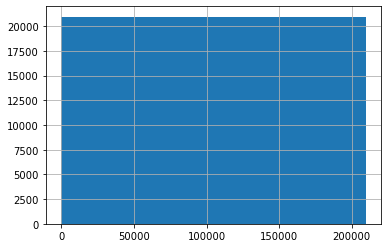

label


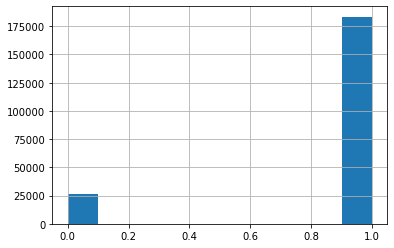

aon


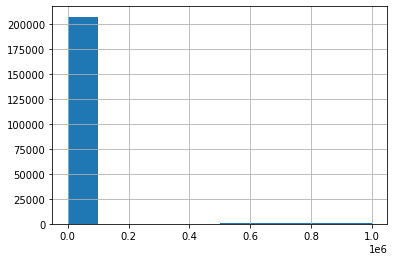

daily_decr30


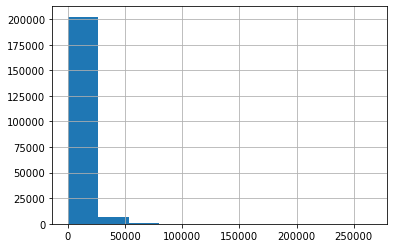

daily_decr90


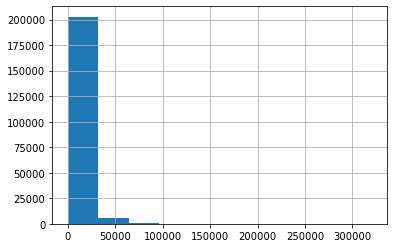

rental30


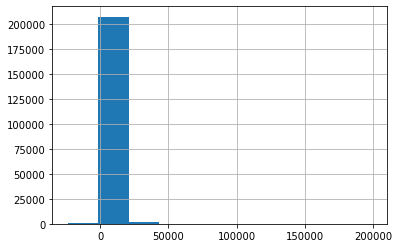

rental90


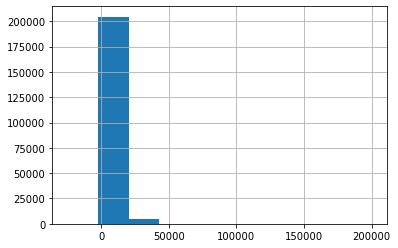

last_rech_date_ma


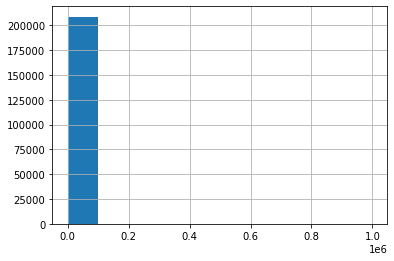

last_rech_date_da


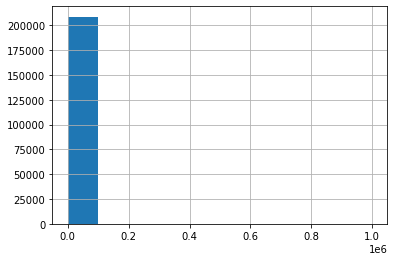

last_rech_amt_ma


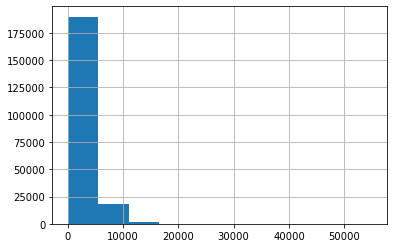

cnt_ma_rech30


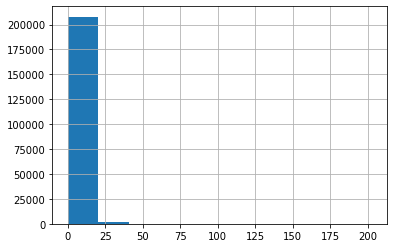

fr_ma_rech30


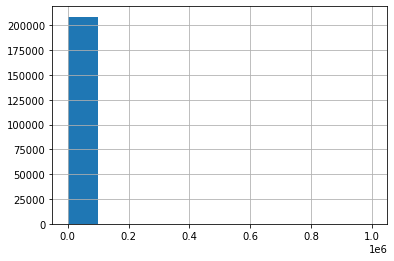

sumamnt_ma_rech30


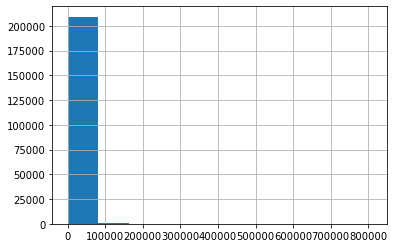

medianamnt_ma_rech30


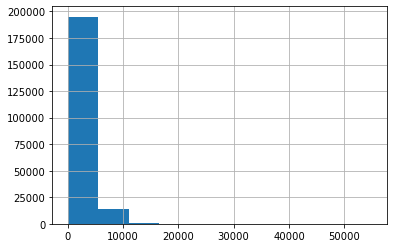

medianmarechprebal30


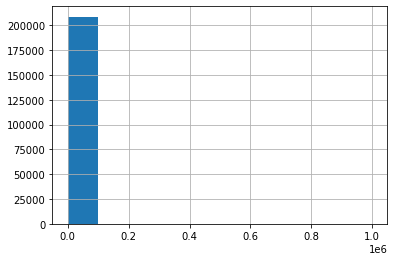

cnt_ma_rech90


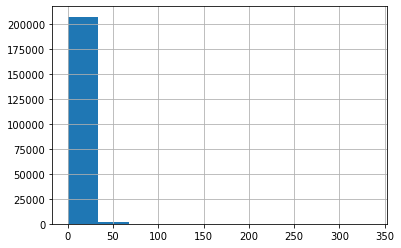

fr_ma_rech90


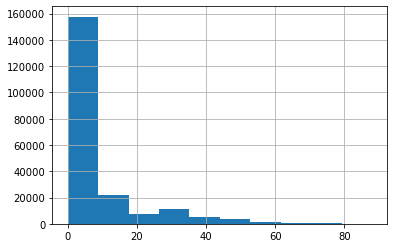

sumamnt_ma_rech90


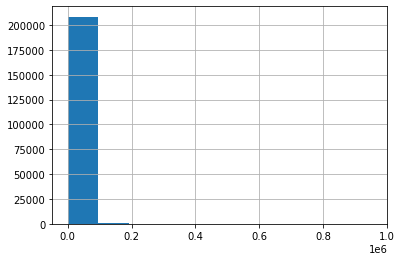

medianamnt_ma_rech90


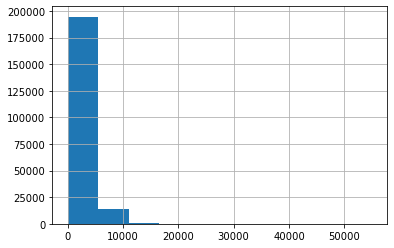

medianmarechprebal90


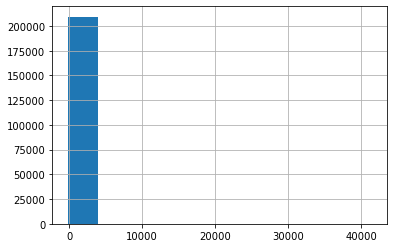

cnt_da_rech30


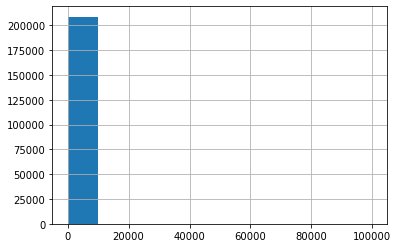

fr_da_rech30


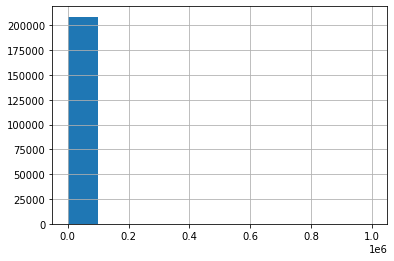

cnt_da_rech90


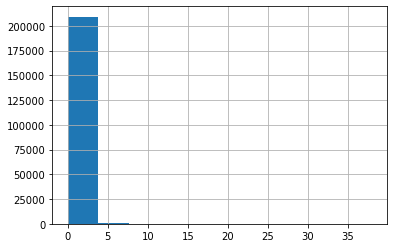

fr_da_rech90


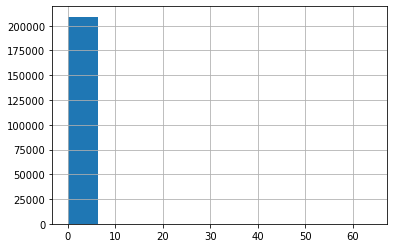

cnt_loans30


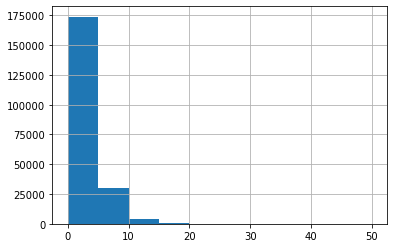

amnt_loans30


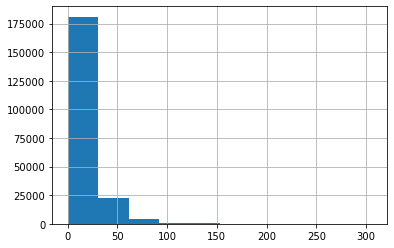

maxamnt_loans30


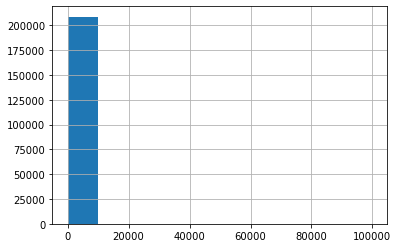

medianamnt_loans30


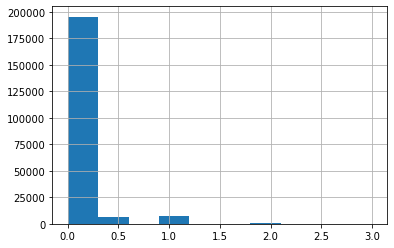

cnt_loans90


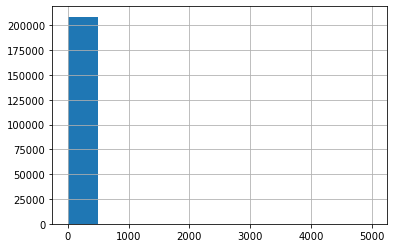

amnt_loans90


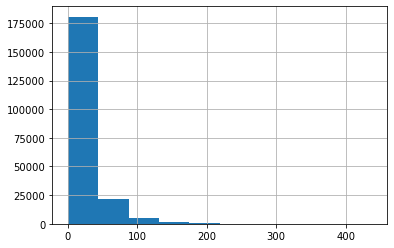

maxamnt_loans90


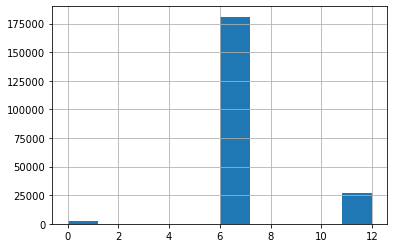

medianamnt_loans90


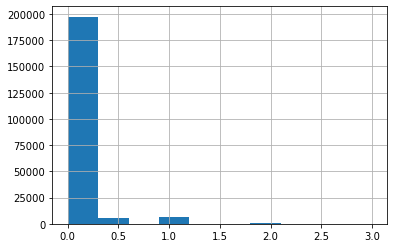

payback30


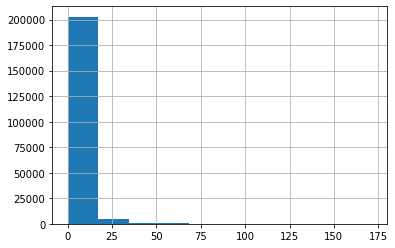

payback90


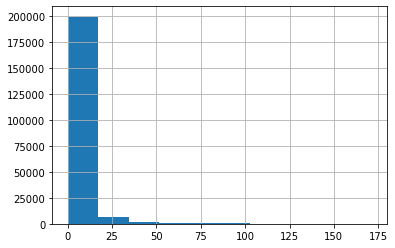

pdate_day


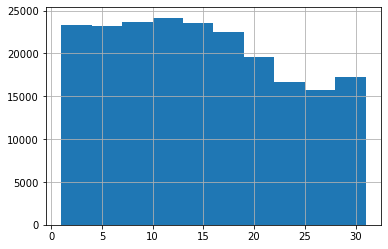

pdate_month


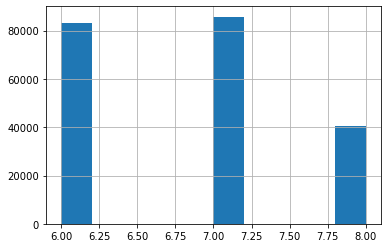

pdate_year


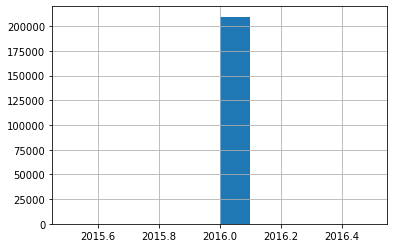

In [18]:
for i in numerical_feat:
    print(i)
    df_temp[i].hist(bins=10)
    plt.show()

Values are shrink to certain values in almost every column

No any proper analysis can be given on the basis of univariate analysis because all columns are showing almost same behaviour

Data is only of year 2016

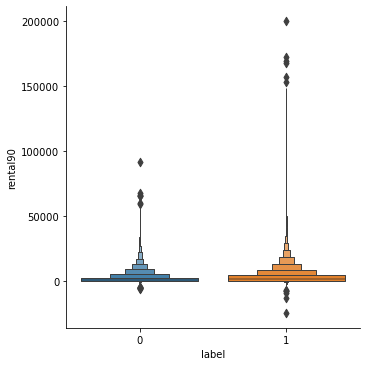

In [19]:
sns.catplot(x='label',y='rental90',kind='boxen',data=df_temp)

Considering negative values as outliers:
    
Outliers are giving label=1 and for less rental90 probability of label=0 is more

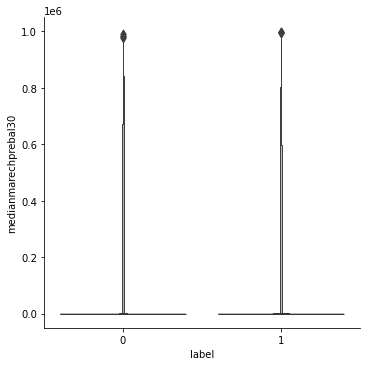

In [20]:
sns.catplot(x='label',y='medianmarechprebal30',kind='boxen',data=df_temp)

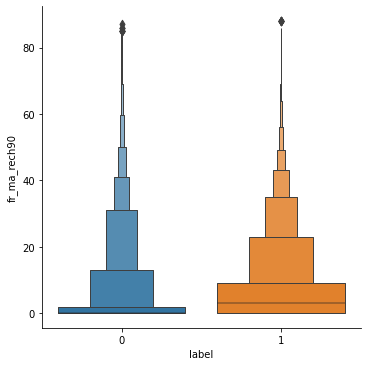

In [21]:
sns.catplot(x='label',y='fr_ma_rech90',kind='boxen',data=df_temp)

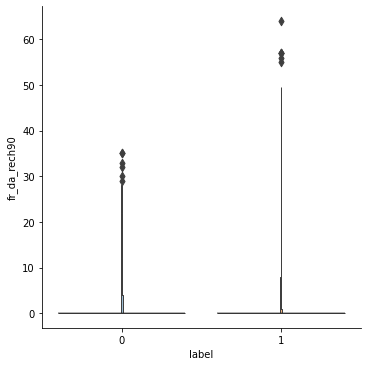

In [22]:
sns.catplot(x='label',y='fr_da_rech90',kind='boxen',data=df_temp)

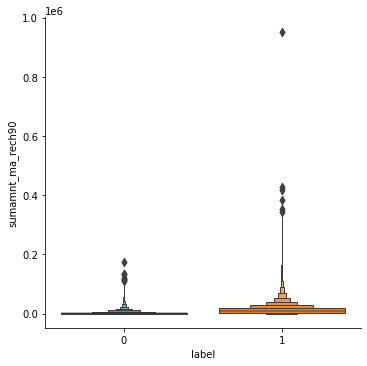

In [23]:
sns.catplot(x='label',y='sumamnt_ma_rech90',kind='boxen',data=df_temp)

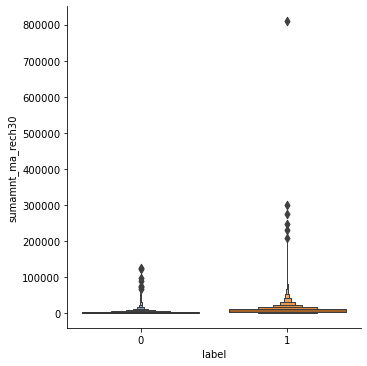

In [24]:
sns.catplot(x='label',y='sumamnt_ma_rech30',kind='boxen',data=df_temp)

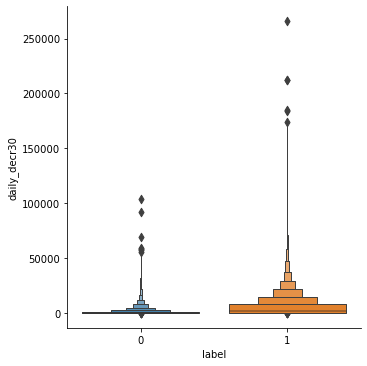

In [25]:
sns.catplot(x='label',y='daily_decr30',kind='boxen',data=df_temp)

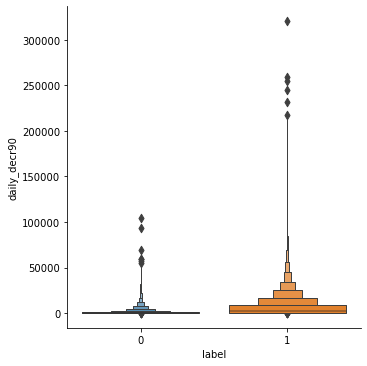

In [26]:
sns.catplot(x='label',y='daily_decr90',kind='boxen',data=df_temp)

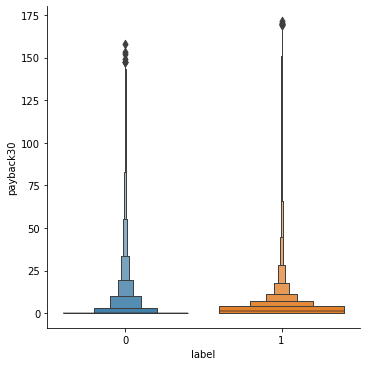

In [27]:
sns.catplot(x='label',y='payback30',kind='boxen',data=df_temp)

Observations:

As the columns and label(target variable) both are imbalanced so box of 0 side is shrinked and of side 1 is broad,

reason being the data is not balanced.


In [28]:
count_6=0
count_12=0
for i,j in zip(df_temp['label'],df_temp['maxamnt_loans30']):
    if(i==1 and j==6.000000):
        count_6+=1
    elif(i==1and j==12.000000):
        count_12+=1
print('Number of people taken 6 Rs loan and sucessfully return',count_6)
print('Number of people taken 12 Rs loan and sucessfully return',count_12)

Number of people taken 6 Rs loan and sucessfully return 154180
Number of people taken 12 Rs loan and sucessfully return 25089


86%  of people successfully  return the loan who had taken 6 rs

94% of people successfully return the loan who had taken 12 rs

In [30]:
categorical_f = [i for i in df_temp if df_temp[i].dtypes=='O']

In [31]:
categorical_f  


#two columns in object datatype

['msisdn', 'pcircle']

In [32]:
df['maxamnt_loans90'].value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [33]:
df['maxamnt_loans30'].value_counts()



6.000000        179193
12.000000        26109
0.000000          3244
59275.166722         1
68599.755670         1
                 ...  
26462.333521         1
53666.885900         1
67319.013426         1
36610.121211         1
28708.879352         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

The values should be either 6 or 12 according to the data description.

So replacing other values with zeros

In [34]:
df_temp['maxamnt_loans30'] = np.where(df_temp['maxamnt_loans30']>12,0,df_temp['maxamnt_loans30'])

In [35]:
df_temp['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

In [36]:
#Analyzing categorical data

for i in categorical_f:
    print(i)
    print(df_temp[i].value_counts())
    print('........................')

msisdn
47819I90840    7
04581I85330    7
94119I84456    6
42825I88688    6
30080I90588    6
              ..
63285I91190    1
63384I82730    1
75819I89239    1
43242I85328    1
33518I70786    1
Name: msisdn, Length: 186243, dtype: int64
........................
pcircle
UPW    209593
Name: pcircle, dtype: int64
........................


In [37]:
#89 percentage of data is unique in msisdn


per = (186243*100)/209593
per

88.85936076109412

In [38]:
df_temp.drop(['msisdn','pcircle','Unnamed: 0'],axis=1,inplace=True)

dropping the columns which has uniques values 

<AxesSubplot:>

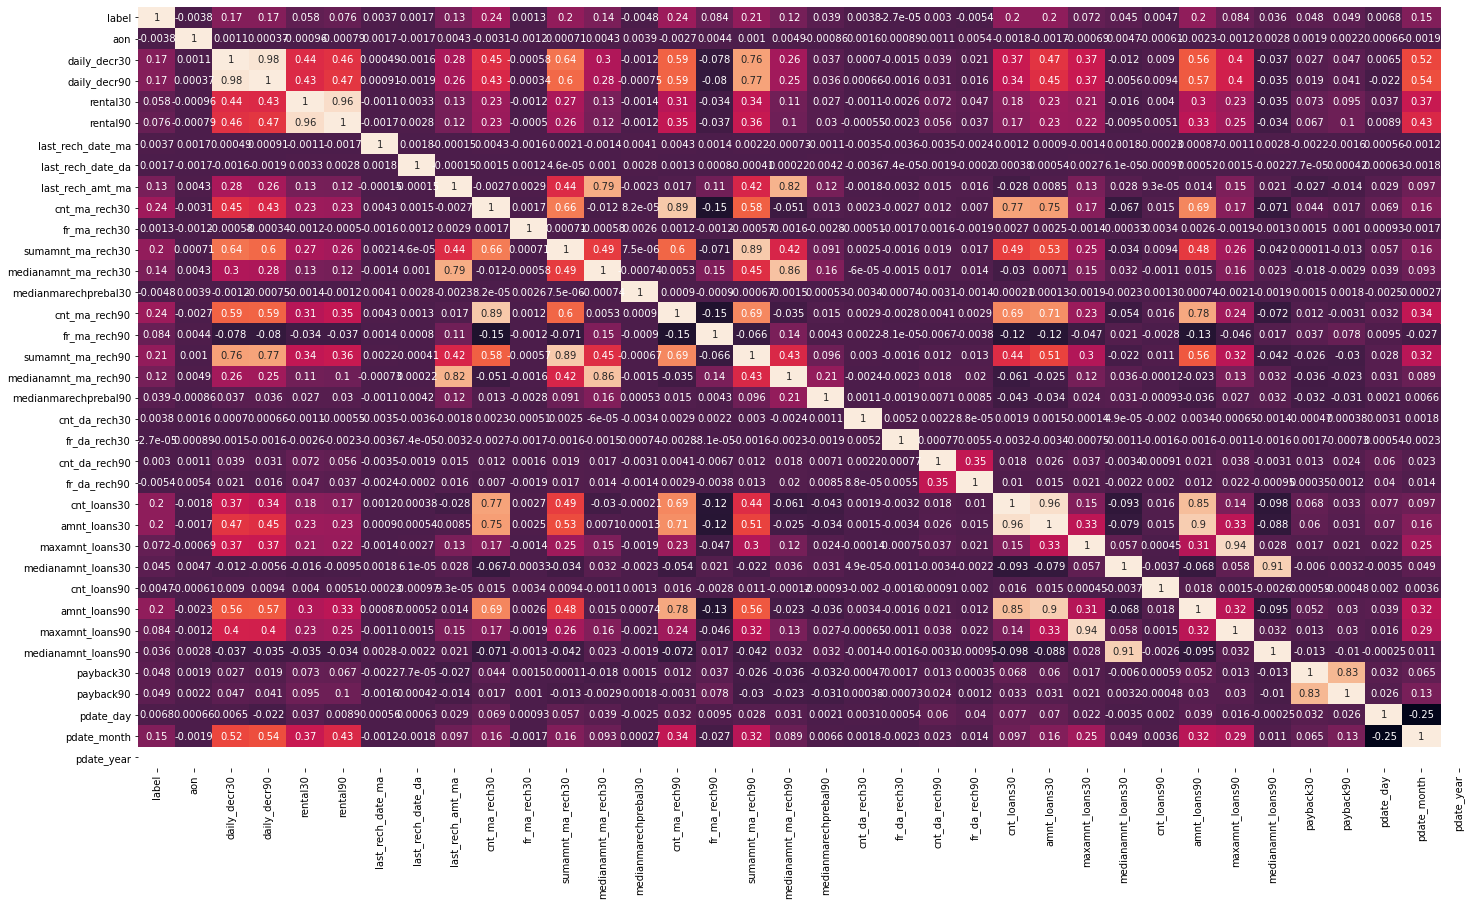

In [39]:
plt.figure(figsize=(24,14))
sns.heatmap(df_temp.corr(),annot=True,cbar=False)

Values in the label and all the independent columns are very less and many zeros are there,

which basically gives less correlation values.

In this type of data considering the range between 0.3 to -0.3 as strong positive and negative correlation resp.

cnt_ma_rech30 is strongly correlated with label and medianprerechprabel30 is least correlated.

label


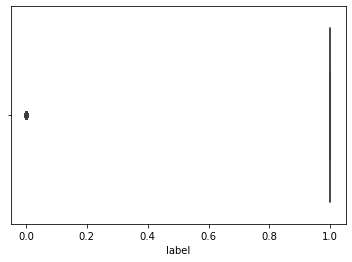

aon


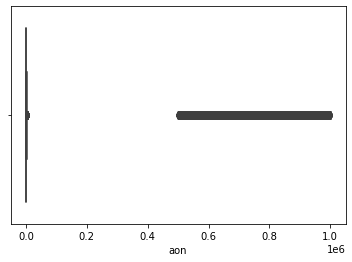

daily_decr30


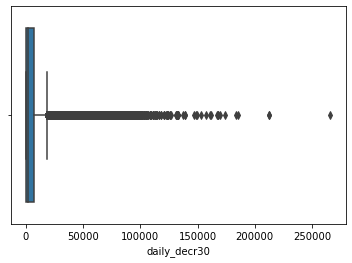

daily_decr90


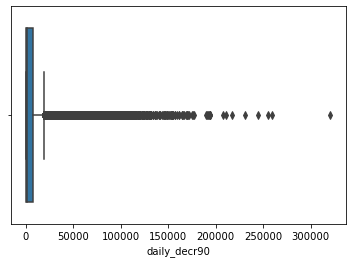

rental30


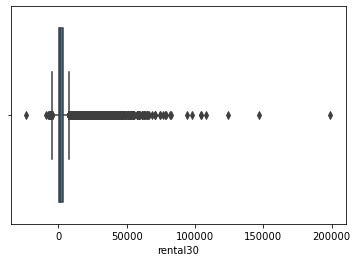

rental90


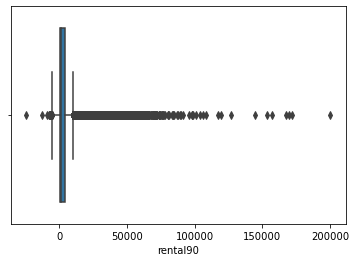

last_rech_date_ma


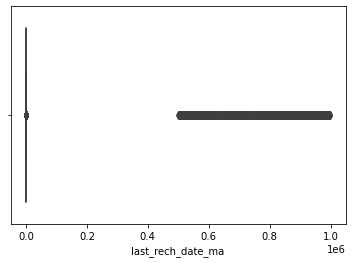

last_rech_date_da


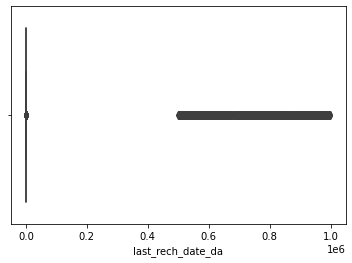

last_rech_amt_ma


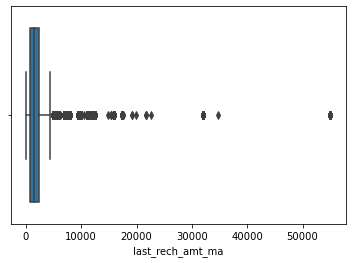

cnt_ma_rech30


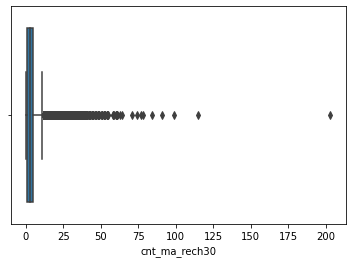

fr_ma_rech30


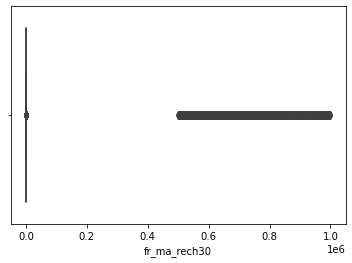

sumamnt_ma_rech30


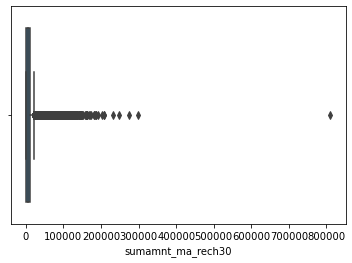

medianamnt_ma_rech30


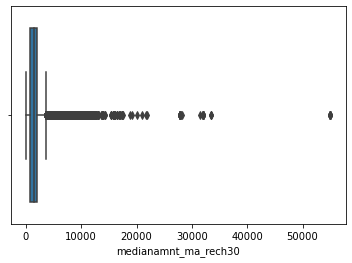

medianmarechprebal30


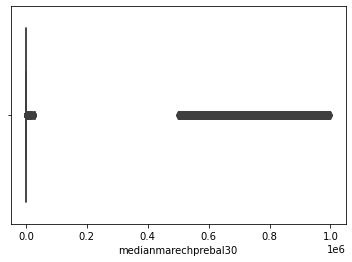

cnt_ma_rech90


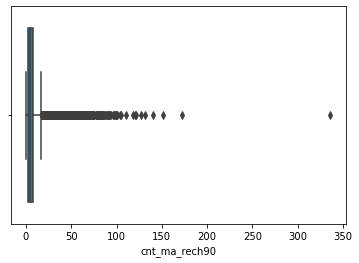

fr_ma_rech90


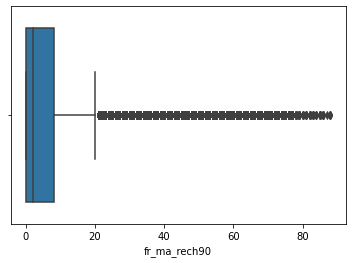

sumamnt_ma_rech90


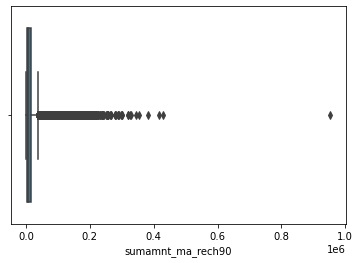

medianamnt_ma_rech90


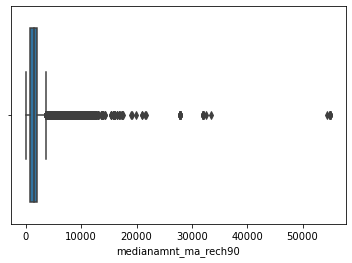

medianmarechprebal90


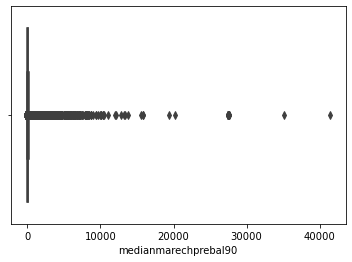

cnt_da_rech30


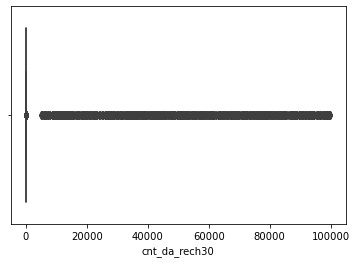

fr_da_rech30


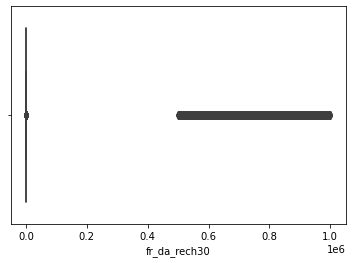

cnt_da_rech90


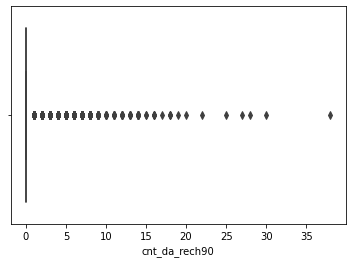

fr_da_rech90


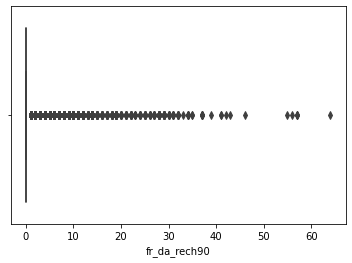

cnt_loans30


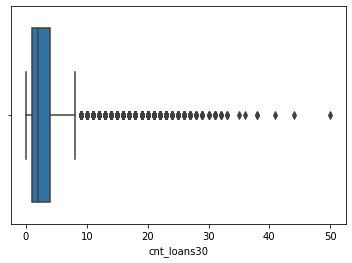

amnt_loans30


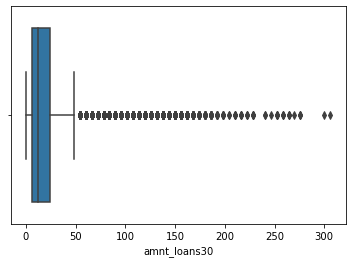

maxamnt_loans30


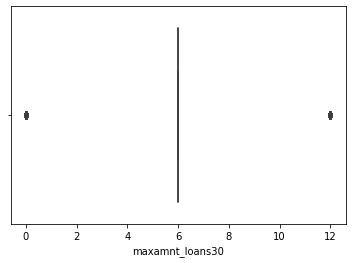

medianamnt_loans30


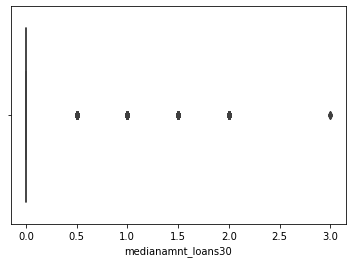

cnt_loans90


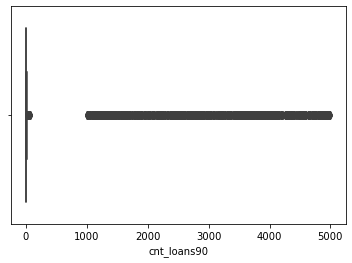

amnt_loans90


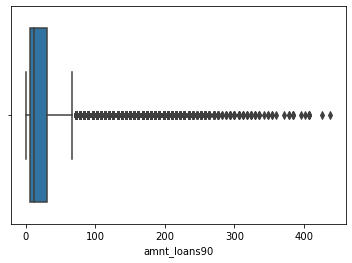

maxamnt_loans90


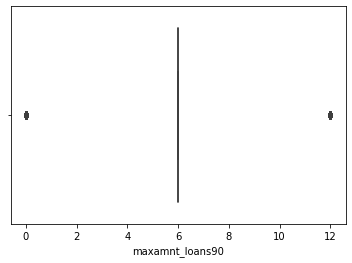

medianamnt_loans90


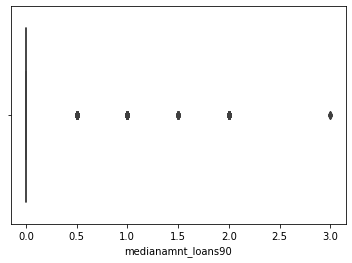

payback30


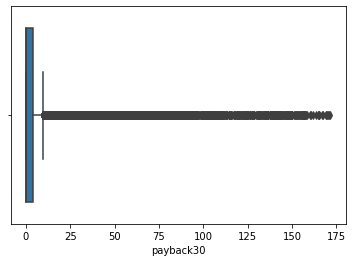

payback90


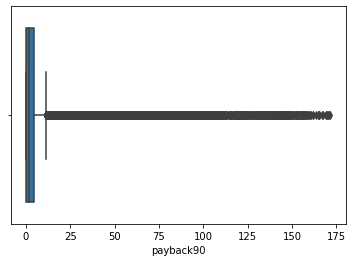

pdate_day


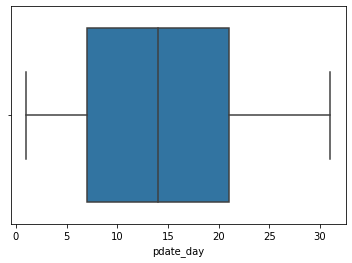

pdate_month


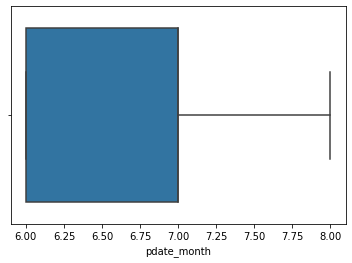

pdate_year


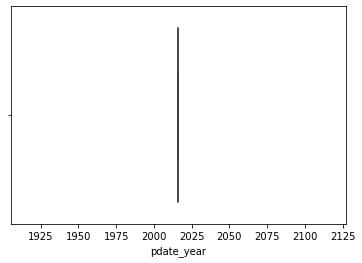

In [40]:
for i in numerical_feat:
    if(i=='Unnamed: 0'):
        pass
    else:
        print(i)
        sns.boxplot(df_temp[i])
        plt.show()

Each columns has outliers

In [41]:
from  scipy.stats import zscore

In [42]:
z_score = abs(zscore(df_temp))

In [43]:
df_new = df_temp[(z_score<3).all(axis=1)]  #eliminating the values greater than 3 zscore values.

In [44]:
df_temp.shape # shape of previous data

(209593, 36)

In [45]:
df_new.shape # shape of new data set : all the rows are eliminated.

(0, 36)

Zscore is not working here may be because the data is skewed

Looking at the skewness of some columns

<AxesSubplot:xlabel='aon', ylabel='Density'>

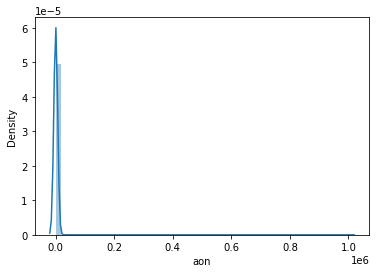

In [6]:
sns.distplot(df['aon'])

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

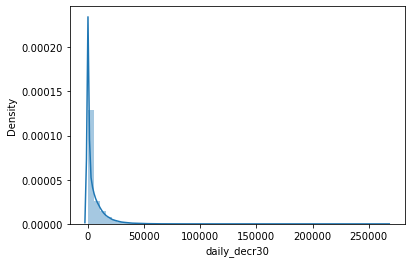

In [7]:
sns.distplot(df['daily_decr30'])

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

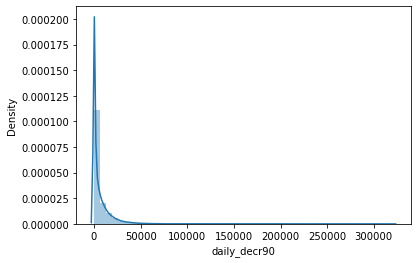

In [8]:
sns.distplot(df['daily_decr90'])

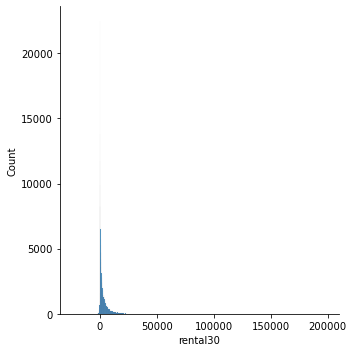

In [9]:
sns.displot(df['rental30'])

# Rough 

trying to get better approach for removing outliers and skewness

In [46]:
df1 = df_temp.copy()

In [47]:
df1['fr_ma_rech30'] = np.where(df_temp['fr_ma_rech30']>0.4,df_temp['fr_ma_rech30'].median(),df_temp['fr_ma_rech30'])

In [48]:
df1['fr_ma_rech30'].shape

(209593,)

<AxesSubplot:xlabel='fr_ma_rech30'>

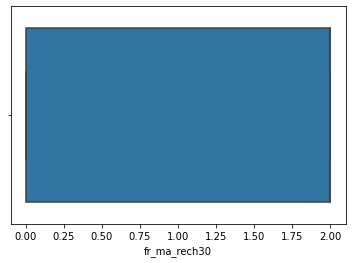

In [49]:
sns.boxplot(df1['fr_ma_rech30'])

In [50]:
q1 = df1.amnt_loans30.quantile(0.25)
q3 = df1.amnt_loans30.quantile(0.75)

In [51]:
iqr = q3-q1 #outliers in amnt_loans30 is only above 75 percentile

In [52]:
upper_lim  = q3 + 1.5*iqr

In [53]:
df1['amnt_loans30'] = np.where(df1['amnt_loans30']>upper_lim,df1['amnt_loans30'].median(),df1['amnt_loans30'])

<AxesSubplot:xlabel='amnt_loans30'>

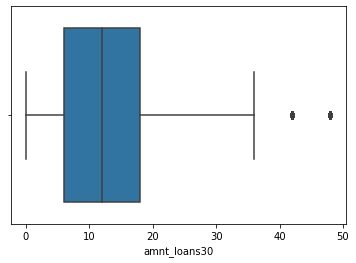

In [54]:
sns.boxplot(df1['amnt_loans30'])   #IQR is working here

<AxesSubplot:xlabel='amnt_loans30', ylabel='Density'>

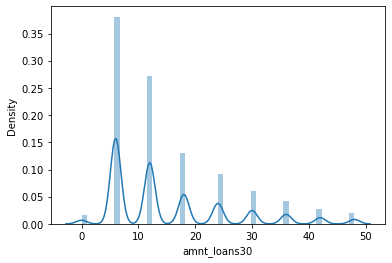

In [55]:
sns.distplot(df1['amnt_loans30'])

In [56]:
for i in numerical_feat:
    if(i=='Unnamed: 0'):
        pass
    else:
        print(i)
        print(df_temp[i].skew())
        print('-----------')

label
-2.270253719912255
-----------
aon
10.392948821587439
-----------
daily_decr30
3.946230229628723
-----------
daily_decr90
4.252565025615919
-----------
rental30
4.521929009584745
-----------
rental90
4.437680540074498
-----------
last_rech_date_ma
14.790973860995035
-----------
last_rech_date_da
14.814857231490318
-----------
last_rech_amt_ma
3.781148637111509
-----------
cnt_ma_rech30
3.283841502993646
-----------
fr_ma_rech30
14.772832636742873
-----------
sumamnt_ma_rech30
6.38678704956917
-----------
medianamnt_ma_rech30
3.512324150491403
-----------
medianmarechprebal30
14.779875343869758
-----------
cnt_ma_rech90
3.4252536465582106
-----------
fr_ma_rech90
2.285422796522632
-----------
sumamnt_ma_rech90
4.897949612129103
-----------
medianamnt_ma_rech90
3.752706023594023
-----------
medianmarechprebal90
44.88050323947868
-----------
cnt_da_rech30
17.818364135256427
-----------
fr_da_rech30
14.776430234353553
-----------
cnt_da_rech90
27.267277681861458
-----------
fr_da_rec

In [57]:
df1['fr_ma_rech30'].skew()

-0.5146018244600384

In [58]:
df2 = df_temp.copy()

In [59]:
#Function returning lower and outer bound of the column

def outlier_treat(datacol):
    q1,q3 = np.percentile(datacol,[25,75])
    iqr = q3-q1
    upper_l  = q3 + 1.5*iqr
    lower_l  = q1 - 1.5*iqr
    return upper_l,lower_l

In [60]:
upper,lower = outlier_treat(df2.daily_decr30)

In [61]:
df2['daily_decr30'] = np.where(df2['daily_decr30']>upper,df2['daily_decr30'].median(),df2['daily_decr30'])

In [62]:
df2['daily_decr30'] = np.where(df2['daily_decr30']<lower,df2['daily_decr30'].median(),df2['daily_decr30'])

In [63]:
upper,lower = outlier_treat(df2.daily_decr90)
df2['daily_decr90'] = np.where(df2['daily_decr90']>upper,df2['daily_decr90'].median(),df2['daily_decr90'])
df2['daily_decr90'] = np.where(df2['daily_decr90']<lower,df2['daily_decr90'].median(),df2['daily_decr90'])

14 columns that I segmented to treat with IQR, beacuse for rest column IQR will cause data loss

In [64]:
list_outlierscol = ['rental30','rental90','last_rech_amt_ma','cnt_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','medianamnt_ma_rech90',
                   'cnt_ma_rech90','fr_ma_rech90','sumamnt_ma_rech90','amnt_loans90','amnt_loans30','cnt_loans30']

In [65]:
for i in list_outlierscol:
    upper,lower = outlier_treat(df2[i])
    df2[i] = np.where(df2[i]>upper,df2[i].median(),df2[i])
    df2[i] = np.where(df2[i]<lower,df2[i].median(),df2[i])
    
    

In [66]:
list_2 = []
for i in df2.columns:
    if(i not in list_outlierscol):
        list_2.append(i)


In [67]:
for i in list_2:
    print(i,df2[i].skew())

label -2.270253719912255
aon 10.392948821587439
daily_decr30 1.5443505614133368
daily_decr90 1.6244971662985028
last_rech_date_ma 14.790973860995035
last_rech_date_da 14.814857231490318
fr_ma_rech30 14.772832636742873
medianmarechprebal30 14.779875343869758
medianmarechprebal90 44.88050323947868
cnt_da_rech30 17.818364135256427
fr_da_rech30 14.776430234353553
cnt_da_rech90 27.267277681861458
fr_da_rech90 28.98808270697841
maxamnt_loans30 1.2418794747510267
medianamnt_loans30 4.551043016959967
cnt_loans90 16.594407973866023
maxamnt_loans90 1.6783037897368753
medianamnt_loans90 4.895720276504792
payback30 8.310694656446502
payback90 6.899950812627082
pdate_day 0.19984532530201307
pdate_month 0.3432418941187077
pdate_year 0


In [68]:
def cube_root(datacol):
    df2[datacol] = np.cbrt(df2[datacol])  # for rest of the column I have used cube root transformation

In [69]:
list_2.remove('label')

In [70]:
list_2.remove('pdate_day')
list_2.remove('pdate_month')
list_2.remove('pdate_year')

In [71]:
for i in list_2:
    cube_root(i)

In [72]:
for i in list_2:
    print(i,df2[i].skew())

aon 8.740118054611601
daily_decr30 0.31461406932172287
daily_decr90 0.3557573212065459
last_rech_date_ma 13.755534520734777
last_rech_date_da 14.001041955144418
fr_ma_rech30 13.69584534326012
medianmarechprebal30 11.57825224400747
medianmarechprebal90 0.5090848308317113
cnt_da_rech30 14.792314034079054
fr_da_rech30 14.127590071823947
cnt_da_rech90 6.670255441463707
fr_da_rech90 17.539626778460395
maxamnt_loans30 -3.9626349623572
medianamnt_loans30 3.5581777653412585
cnt_loans90 10.411644333051933
maxamnt_loans90 -3.6987960398673234
medianamnt_loans90 3.892717341068507
payback30 0.7451906275675773
payback90 0.6319528603258964


In [73]:
upper,lower = outlier_treat(df2['medianmarechprebal30'])

In [74]:
df2['medianmarechprebal30'] = np.where(df2['medianmarechprebal30']>upper,df2['medianmarechprebal30'].median(),df2['medianmarechprebal30'])
df2['medianmarechprebal30'] = np.where(df2['medianmarechprebal30']<lower,df2['medianmarechprebal30'].median(),df2['medianmarechprebal30'])
    
    

In [76]:
df2.last_rech_date_ma = df2.last_rech_date_ma.astype(int)

In [77]:
cube_root('last_rech_date_ma')

In [78]:
df2['last_rech_date_da'].value_counts()

0.000000     202861
1.912931        163
2.000000        160
2.223980        149
2.351335        148
              ...  
93.649588         1
88.269051         1
90.539804         1
90.633093         1
80.148176         1
Name: last_rech_date_da, Length: 1174, dtype: int64

In [79]:
cube_root('last_rech_date_da')

In [80]:
df2['fr_ma_rech30'].value_counts()

0.000000     78683
1.000000     22370
1.259921     18849
1.442250     14306
1.587401     11194
             ...  
87.390526        1
99.097701        1
85.134963        1
84.539042        1
85.302017        1
Name: fr_ma_rech30, Length: 1083, dtype: int64

In [81]:
cube_root('fr_ma_rech30')

In [82]:
df2['cnt_da_rech30'].value_counts()

0.000000     205479
1.000000       2331
1.259921        372
1.442250        156
1.587401         86
              ...  
31.634390         1
42.286119         1
37.691181         1
21.767743         1
28.142202         1
Name: cnt_da_rech30, Length: 1066, dtype: int64

In [83]:
cube_root('cnt_da_rech30')   #columns that I have used for cube root transformation having 75 to 80% of zeros

In [84]:
df2['fr_da_rech90'] = df_temp['fr_da_rech90']

In [85]:
cube_root('fr_da_rech90')

In [86]:
cube_root('cnt_loans90')

In [87]:
for i in list_outlierscol:
    print(i)
    print(df2[i].skew())

rental30
1.496210963986692
rental90
1.5293551618912475
last_rech_amt_ma
1.0383738927545547
cnt_ma_rech30
0.9262602519135014
sumamnt_ma_rech30
1.104488808485027
medianamnt_ma_rech30
0.27142901458530766
medianamnt_ma_rech90
0.3407807799681405
cnt_ma_rech90
1.029831975998241
fr_ma_rech90
1.8375436166117038
sumamnt_ma_rech90
1.2093410685895565
amnt_loans90
1.3997466341384783
amnt_loans30
1.2591158822140445
cnt_loans30
1.3083956040176632


Due to outliers removal skewness is also affected and skewness value comes closer to normal or slightly normal distribution.

In [88]:
df2.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month,pdate_year
0,0,6.479224,14.510179,14.526152,220.13,260.13,1.000000,0.0,1539.0,2.0,...,0.0,1.080060,12.0,1.817121,0.0,3.072317,3.072317,20,7,2016
1,1,8.929490,22.971610,22.973347,3691.26,3691.26,1.259921,0.0,1539.0,1.0,...,0.0,1.000000,12.0,2.289428,0.0,0.000000,0.000000,10,8,2016
2,1,8.118041,11.181560,11.181560,900.13,900.13,1.000000,0.0,1539.0,1.0,...,0.0,1.000000,6.0,1.817121,0.0,0.000000,0.000000,19,8,2016
3,1,6.223084,2.768873,2.768873,159.42,159.42,1.442250,0.0,947.0,0.0,...,0.0,1.080060,12.0,1.817121,0.0,0.000000,0.000000,6,6,2016
4,1,9.820117,5.320595,5.320595,1098.90,1098.90,1.000000,0.0,2309.0,7.0,...,0.0,1.241366,42.0,1.817121,0.0,1.326352,1.326352,22,6,2016


In [89]:
from sklearn.preprocessing import power_transform
df1 = pd.DataFrame(power_transform(df2),columns=df2.columns)

In [90]:
df1.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month,pdate_year
0,-2.647896,-0.337907,0.616769,0.609193,-0.721757,-0.715335,0.052265,-0.1447,0.298946,-0.269545,...,-0.269051,-0.168779,-0.174144,-0.295555,-0.248272,1.617875,1.608968,0.710817,0.397522,0.0
1,0.377658,0.164211,1.423257,1.398722,1.144256,0.789162,0.620672,-0.1447,0.298946,-0.828540,...,-0.269051,-0.614407,-0.174144,2.368606,-0.248272,-0.964141,-1.055130,-0.410151,1.480133,0.0
2,0.377658,0.006814,0.238072,0.234190,-0.307524,-0.396900,0.052265,-0.1447,0.298946,-0.828540,...,-0.269051,-0.614407,-1.010940,-0.295555,-0.248272,-0.964141,-1.055130,0.609967,1.480133,0.0
3,0.377658,-0.395625,-1.080120,-1.077708,-0.763155,-0.771367,1.022675,-0.1447,-0.297273,-1.680739,...,-0.269051,-0.168779,-0.174144,-0.295555,-0.248272,-0.964141,-1.055130,-0.968724,-1.133997,0.0
4,0.377658,0.328604,-0.590736,-0.588017,-0.195008,-0.304704,0.052265,-0.1447,0.935055,1.296339,...,-0.269051,0.745074,1.467992,-0.295555,-0.248272,0.797805,0.607118,0.907066,-1.133997,0.0


In [91]:
for i in df1.columns:
    print(i,df1[i].skew())

label -2.270253719912255
aon 1.509352587190279
daily_decr30 -0.141766584028535
daily_decr90 -0.132809311077211
rental30 0.43636622724593177
rental90 0.4246828142283497
last_rech_date_ma 1.1421182805222423
last_rech_date_da -21.756592490339727
last_rech_amt_ma -0.4211540906254294
cnt_ma_rech30 -0.03686288357366363
fr_ma_rech30 -0.045041825453862226
sumamnt_ma_rech30 -0.49505691203809576
medianamnt_ma_rech30 -0.7837637621204877
medianmarechprebal30 -0.1266202377606939
cnt_ma_rech90 -0.038047945183730995
fr_ma_rech90 0.08514894509914052
sumamnt_ma_rech90 -0.3869974937696582
medianamnt_ma_rech90 -0.6446029517167231
medianmarechprebal90 0.5433191176952549
cnt_da_rech30 6.925820462205418
fr_da_rech30 11.39066533190769
cnt_da_rech90 6.006576961649057
fr_da_rech90 15.469699924779537
cnt_loans30 0.024761950419044543
amnt_loans30 0.016566269925437895
maxamnt_loans30 0.5455580026105558
medianamnt_loans30 3.447735320298421
cnt_loans90 0.9825936159168788
amnt_loans90 0.0011085032378831434
maxamnt_l

Using minmax scaler to shrink the data in particular range

In [92]:
from sklearn.preprocessing import MinMaxScaler
min_sc = MinMaxScaler()
df1 =  pd.DataFrame(min_sc.fit_transform(df1),columns=df1.columns)

In [93]:
df1.drop('pdate_year',axis=1,inplace=True) 

#dropping year column as it has only one value throughout

<AxesSubplot:xlabel='label', ylabel='count'>

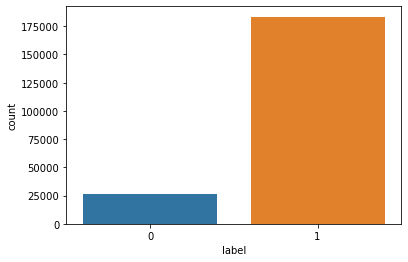

In [94]:
sns.countplot(df_temp['label']) #target variable is imbalanced

In [95]:
one = df_temp[df_temp['label']==1]
zero = df_temp[df_temp['label']==0]
print(one.shape,zero.shape)

(183431, 36) (26162, 36)


In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

In [97]:
x = df1.drop('label',axis=1)
y = df_temp['label']

In [98]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

trying both the under and over sampling

In [100]:
rover = RandomOverSampler()
x1,y1 = rover.fit_resample(x,y)
print(Counter(y1))

Counter({0: 183431, 1: 183431})


In [101]:
runder = RandomUnderSampler()
x_under,y_under = runder.fit_resample(x,y)
print(Counter(y_under))

Counter({0: 26162, 1: 26162})


In [102]:
x_train_u,x_test_u,y_train_u,y_test_u = train_test_split(x_under,y_under,test_size=.33)

Spitting the data for both the sampling techniques

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=.33)

In [104]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [105]:
pred = lr.predict(x_test)

In [106]:
accuracy_score(pred,y_test)

0.7613100400611242

In [107]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76     60237
           1       0.76      0.76      0.76     60828

    accuracy                           0.76    121065
   macro avg       0.76      0.76      0.76    121065
weighted avg       0.76      0.76      0.76    121065



In [108]:
lr = LogisticRegression()
lr.fit(x_train_u,y_train_u)

LogisticRegression()

In [109]:
pred_u = lr.predict(x_test_u)
print(accuracy_score(pred_u,y_test_u))
print(classification_report(pred_u,y_test_u))


0.76336364162854
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      8651
           1       0.76      0.76      0.76      8616

    accuracy                           0.76     17267
   macro avg       0.76      0.76      0.76     17267
weighted avg       0.76      0.76      0.76     17267



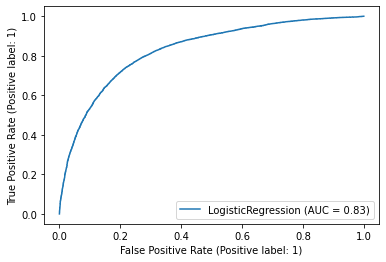

In [146]:
plot_roc_curve(lr,x_test_u,y_test_u)
plt.show()       #under sampling is working well

# Accuracy score = 76% , F1 = 0.76 and AUC = 0.83

In [110]:
from sklearn.feature_selection import RFE

In [111]:
rfe = RFE(estimator=lr,step=1)
rfe = rfe.fit(x_train_u,y_train_u)
selected_feature = pd.DataFrame({'features':list(x_train_u.columns),'ranking':rfe.ranking_})
selected_feature.sort_values(by='ranking',ascending=True)

,features,ranking
0,aon,1
17,medianmarechprebal90,1
32,pdate_day,1
15,sumamnt_ma_rech90,1
24,maxamnt_loans30,1
13,cnt_ma_rech90,1
12,medianmarechprebal30,1
25,medianamnt_loans30,1
27,amnt_loans90,1
21,fr_da_rech90,1


In [112]:
#Finding best random state

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_under,y_under,test_size=.33,random_state=i)
    lr =  LogisticRegression()
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    pred_train = lr.predict(x_train)
    if(round(accuracy_score(pred_test,y_test)*100,1)==round(accuracy_score(pred_train,y_train)*100,1)):
        print('random state',i)
        print('test accuracy',accuracy_score(pred_test,y_test))
        print('train accuracy',accuracy_score(pred_train,y_train))

random state 23
test accuracy 0.7601783749348469
train accuracy 0.7601334968765154
random state 24
test accuracy 0.7596571494758788
train accuracy 0.7599052970876002
random state 25
test accuracy 0.7599467191753055
train accuracy 0.7601049719029009
random state 45
test accuracy 0.7599467191753055
train accuracy 0.7600764469292866
random state 46
test accuracy 0.7599467191753055
train accuracy 0.7597911971931426
random state 53
test accuracy 0.7600046331151908
train accuracy 0.759534472430613
random state 57
test accuracy 0.7604679446342735
train accuracy 0.7598767721139857
random state 61
test accuracy 0.7598308912955348
train accuracy 0.7604187466126594
random state 71
test accuracy 0.7605837725140441
train accuracy 0.760675471375189
random state 79
test accuracy 0.7604679446342735
train accuracy 0.7600764469292866
random state 84
test accuracy 0.7602942028146175
train accuracy 0.7596200473514562


In [113]:
x_train_u,x_test_u,y_train_u,y_test_u = train_test_split(x_under,y_under,test_size=.33,random_state=23)

Other algorithms

In [114]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
svc = SVC()
svc.fit(x_train_u,y_train_u)
pred_svc = svc.predict(x_test_u)
cross_score = cross_val_score(svc,x_under,y_under,cv=5)
print(accuracy_score(y_test_u,pred_svc))
print(cross_score.mean())

0.8097527074766896
0.8145401063834449


In [117]:
print(classification_report(pred_svc,y_test_u))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      8960
           1       0.80      0.81      0.80      8307

    accuracy                           0.81     17267
   macro avg       0.81      0.81      0.81     17267
weighted avg       0.81      0.81      0.81     17267



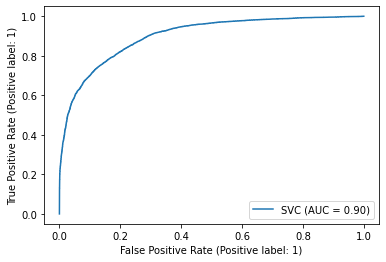

In [145]:
plot_roc_curve(svc,x_test_u,y_test_u)
plt.show()

# Accuracy score = 80% , F1 = 0.81 and AUC = 0.90

In [118]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train_u,y_train_u)

DecisionTreeClassifier()

In [119]:
pred_dtc = dtc.predict(x_test_u)
cross_score = cross_val_score(dtc,x_under,y_under,cv=5)
print(accuracy_score(y_test_u,pred_dtc))
print(cross_score.mean())

0.7931893206694851
0.7913194995404809


In [120]:
print(classification_report(pred_dtc,y_test_u))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      8724
           1       0.79      0.79      0.79      8543

    accuracy                           0.79     17267
   macro avg       0.79      0.79      0.79     17267
weighted avg       0.79      0.79      0.79     17267



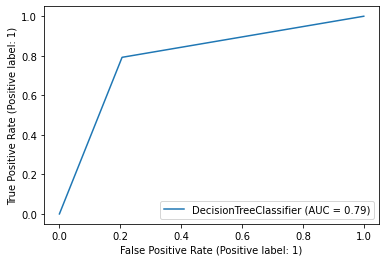

In [144]:
plot_roc_curve(dtc,x_test_u,y_test_u)
plt.show()

# Accuracy score = 79% , F1 = 0.80 and AUC = 0.79

In [121]:
knn = KNeighborsClassifier()
knn.fit(x_train_u,y_train_u)

KNeighborsClassifier()

In [122]:
pred_knn = knn.predict(x_test_u)
cross_score = cross_val_score(knn,x_under,y_under,cv=5)
print(accuracy_score(y_test_u,pred_knn))
print(cross_score.mean())

0.7945213412868477
0.7969765791315452


In [123]:
print(classification_report(pred_dtc,y_test_u))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      8724
           1       0.79      0.79      0.79      8543

    accuracy                           0.79     17267
   macro avg       0.79      0.79      0.79     17267
weighted avg       0.79      0.79      0.79     17267



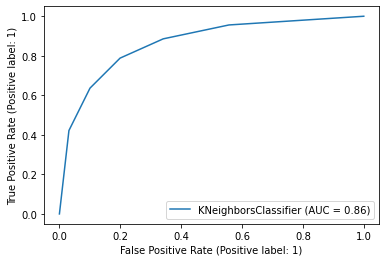

In [143]:
plot_roc_curve(knn,x_test_u,y_test_u)
plt.show()

# Accuracy score = 79% , F1 = 0.80 and AUC = 0.86

In [124]:
from sklearn.ensemble import RandomForestClassifier

Considering Random forest as best model on the basis of cross val score , F1 score and AUC curve

In [125]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train_u,y_train_u)


RandomForestClassifier()

In [126]:
p2 = rfc.predict(x_test_u)
print(accuracy_score(y_test_u,p2))
print(classification_report(y_test_u,p2))

0.8460647477847918
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      8759
           1       0.83      0.86      0.85      8508

    accuracy                           0.85     17267
   macro avg       0.85      0.85      0.85     17267
weighted avg       0.85      0.85      0.85     17267



In [127]:
cross_score = cross_val_score(rfc,x_under,y_under,cv=5)
print('cross score',cross_score.mean())

cross score 0.8482149578250496


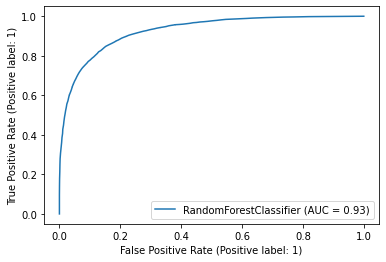

In [142]:
plot_roc_curve(rfc,x_test_u,y_test_u)
plt.show()

# Accuracy score = 84% , F1 = 0.85 and AUC = 0.93

In [128]:
from sklearn.ensemble import AdaBoostClassifier

In [129]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(x_train_u,y_train_u)


AdaBoostClassifier(n_estimators=100)

In [130]:
p2 = ada.predict(x_test_u)
cross_score = cross_val_score(ada,x_under,y_under,cv=5)
print('accuracy score',accuracy_score(y_test_u,p2))
print('cross score',cross_score.mean())
print(classification_report(y_test_u,p2))


accuracy score 0.8460647477847918
cross score 0.8224332564789286
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      8759
           1       0.83      0.86      0.85      8508

    accuracy                           0.85     17267
   macro avg       0.85      0.85      0.85     17267
weighted avg       0.85      0.85      0.85     17267



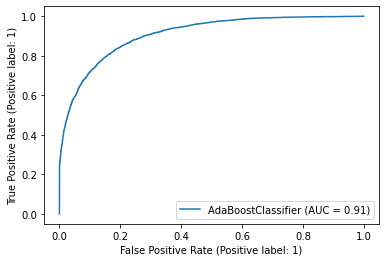

In [141]:
plot_roc_curve(ada,x_test_u,y_test_u)
plt.show()

# Accuracy score = 84% , F1 = 0.85 and AUC = 0.91

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
parameters = {
    'n_estimators':[100,300,500],
    'max_depth':[5,6,8],
    'min_samples_split':[50,100]
}


In [133]:
gb_ = RandomForestClassifier()

grid_obj_gb = GridSearchCV(gb_,parameters,cv=5)

grid_obj_gb.fit(x_train_u,y_train_u)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 8], 'min_samples_split': [50, 100],
                         'n_estimators': [100, 300, 500]})

In [134]:
print(grid_obj_gb.best_params_)
print(grid_obj_gb.best_score_)

{'max_depth': 8, 'min_samples_split': 50, 'n_estimators': 500}
0.8099095643281771


In [135]:
gb_best =RandomForestClassifier(n_estimators=300,min_samples_split=50,max_depth=8)

gb_best.fit(x_train_u,y_train_u)

RandomForestClassifier(max_depth=8, min_samples_split=50, n_estimators=300)

In [136]:
pred_gb_best = gb_best.predict(x_test_u)

accuracy_score(pred_gb_best,y_test_u)

0.8124746626513002

In [137]:
print(classification_report(pred_gb_best,y_test_u))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      8849
           1       0.80      0.81      0.81      8418

    accuracy                           0.81     17267
   macro avg       0.81      0.81      0.81     17267
weighted avg       0.81      0.81      0.81     17267



In [138]:
from sklearn.metrics import plot_roc_curve

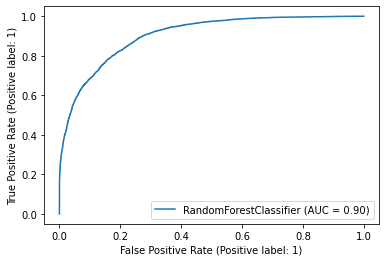

In [139]:
plot_roc_curve(gb_best,x_test_u,y_test_u)
plt.show()

# Accuracy score = 81% , F1 = 0.82 and AUC = 0.90